In [1]:
%load_ext autoreload
%autoreload 2

In [7]:
from tqdm.notebook import tqdm

In [10]:
from plaid.evaluation import RITAPerplexity
import torch

device = torch.device("cuda")
perplexity_calc = RITAPerplexity(device=device)

In [11]:
from plaid.datasets import FastaDataset

val_fasta = '/data/lux70/data/pfam/val.fasta'
ds = FastaDataset(val_fasta)

dataloader = torch.utils.data.DataLoader(ds, batch_size=512, shuffle=False)
batch = next(iter(dataloader))

In [16]:
# perplexities = []
# max_len = 512

# for batch in tqdm(dataloader):
#     _, sequences = batch
#     pps = [perplexity_calc.calc_perplexity(s[:max_len]) for s in sequences]
#     perplexities.extend(pps)

In [27]:
# outdir = "/data/lux70/plaid/artifacts/natural"
# import pickle
# outpath = f"{outdir}/perplexities.npz"
# np.savez_compressed(outpath, values=np.array(perplexities))

/tmp/ipykernel_4064111/2213180737.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(perplexities, bins=100)


<Axes: ylabel='Density'>

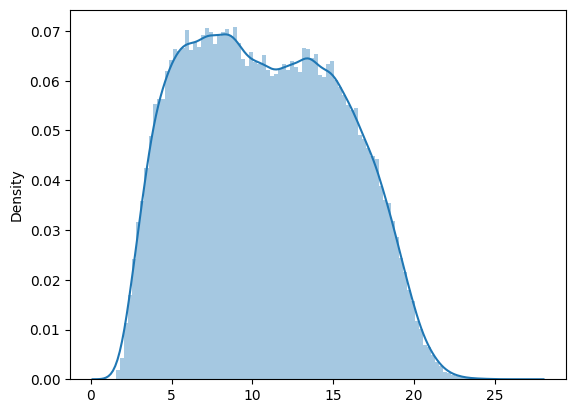

In [31]:
import seaborn as sns
sns.distplot(perplexities, bins=100)

In [21]:
import numpy as np
np.mean(perplexities)

10.79791807284371

In [28]:
with open(outpath, "rb") as f:
    x = np.load(f)['values']